# Сборный проект

## Откроем файл и изучим общую информацию

### Откроем файл

In [1347]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Изучим общую информацию

In [1348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Во многих столбцах есть пропуски. Больше всех в последних трех столбцах: 'Critic_Score', 'User_Score', 'Rating'.

**Вывод:**
- Всего 16715 игр
- Стоит провести предаброботку данных


## Предобработаем данные

### Приведем названия столбцов к нижнему регистру

In [1349]:
data.columns = data.columns.str.lower()

In [1350]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


###  Преобразуем типы данных и обработаем пропуски

In [1351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [1352]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце 'name' всего 2 пропуска. Удалим их.

In [1353]:
data = data.dropna(subset=['name'])

В столбце 'year_of_release' так же удалим пропуска, так как без года выпуска мы не сможем провести дальнейший анализ.

In [1354]:
data = data.dropna(subset=['year_of_release'])

Преобразуем его в тип Int, так как это года.

In [1355]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int64

In [1356]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Рассмотрим столбец 'critic_score'

In [1357]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

<AxesSubplot:>

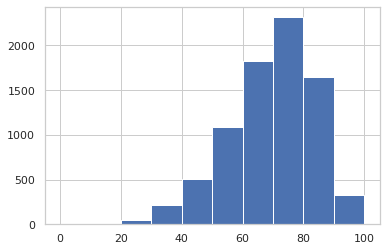

In [1358]:
data['critic_score'].hist(bins=10, range=(0, 100))

Пропусков много, удалять их нельзя. На ноль менять тоже не будем, так как это сильно исказит среднее значение. Оставим как есть.

Рассмотрим столбец 'user_score'

In [1359]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть странное значение 'tbd'

In [1360]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Посмотрим сколько их

In [1361]:
len(data[data['user_score']=='tbd'])

2376

Абривеатура 'tbd' значит, что оценка еще не выставлена. Заменим ее на 'nan'.

In [1362]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [1363]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Так же как и в предыдущем столбце, не будем менять пропуски на 0.

Преобразуем 'user_score' в 'float64'

In [1364]:
data['user_score'] = data['user_score'].astype('float64')

In [1365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Рассмотрим столбец 'rating'

In [1366]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Здесь тоже оставим как есть.

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [1367]:
data['general_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [1368]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Вывод:**
- Привели названия столбцов к нижнему регистру
- Удалили пропуска и изменили тип данных, там где это нужно
- Создали новый столбец с общей суммой продаж

## Проведем исследовательский анализ данных

### Посмотрим сколько игр выпускалось в каждые годы

In [1369]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

С каждым годом количество выпускаемых игр растет.

### Посмотрим, как менялись продажи по платформам

Выберем платформы с наибольшими суммарными продажами

In [1370]:
data.pivot_table(index = 'platform', values = 'general_sales', aggfunc = 'sum').sort_values(by='general_sales', ascending=False)

,general_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Больше всего игр продается на 'PS2', 'X360', 'PS3', 'Wii', 'DS' и 'PS' 

Возьмем пратформы с наибольшими продажами и посмотрим по годам

<AxesSubplot:title={'center':'PS'}, xlabel='year_of_release'>

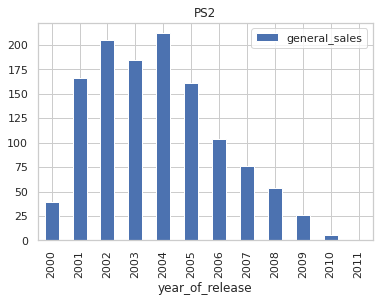

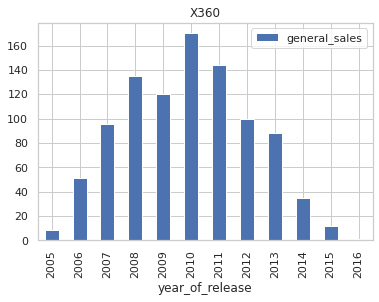

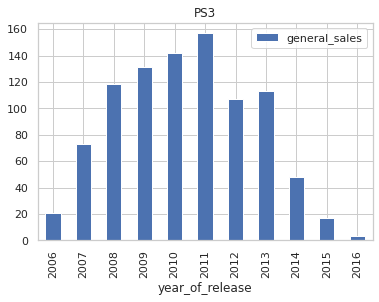

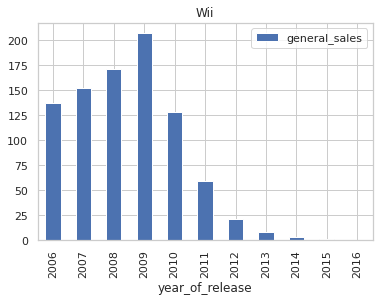

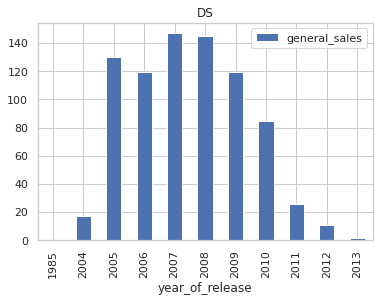

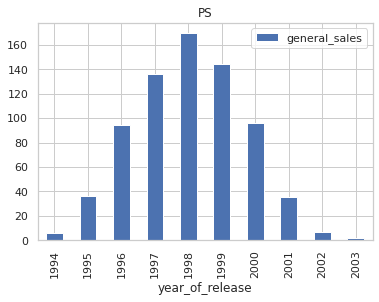

In [1371]:
data[data['platform'] == 'PS2'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').plot(kind='bar', title='PS2')
data[data['platform'] == 'X360'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').plot(kind='bar', title='X360')
data[data['platform'] == 'PS3'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').plot(kind='bar', title='PS3')
data[data['platform'] == 'Wii'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').plot(kind='bar', title='Wii')
data[data['platform'] == 'DS'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').plot(kind='bar', title='DS')
data[data['platform'] == 'PS'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').plot(kind='bar', title='PS')


Одна платформа существует 10-11 лет. Рост продаж идет первые 5 лет, а дальше спад

###  Возьмем данные за актуальный период

Для начала возьмем данные за последние 5 лет

In [1372]:
data = data[data['year_of_release'] >= 2011]

In [1373]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Посмотрим какие платформы лидируют по продажам

In [1374]:
data.pivot_table(index = 'platform', values = 'general_sales', aggfunc = 'sum').sort_values(by='general_sales', ascending=False)

,general_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


Найдем потенциально прибыльные, то есть те, которые только появились в этот период

In [1375]:
data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'general_sales', aggfunc = 'sum')

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Потенциально прибыльные платформы: PC, PS4,WiiU, XOne. Платформа PC существует во все года, поэтому она тоже потенциально прибыльна.

In [1376]:
data = data[(data['platform'] == 'PC') |
                (data['platform'] == 'PS4') |
                (data['platform'] == 'WiiU') |
                (data['platform'] == 'XOne')]

Далее будем использовать данные за последние 2 года

In [1377]:
data = data[data['year_of_release'] >= 2015]

Посмотрим какие платформы лидируют по продажам теперь

In [1378]:
data.pivot_table(index = 'platform', values = 'general_sales', aggfunc = 'sum').sort_values(by='general_sales', ascending=False)


,general_sales
platform,
PS4,188.15
XOne,86.29
WiiU,20.95
PC,13.77


Теперь лидирует 'PS4'

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 2.0)

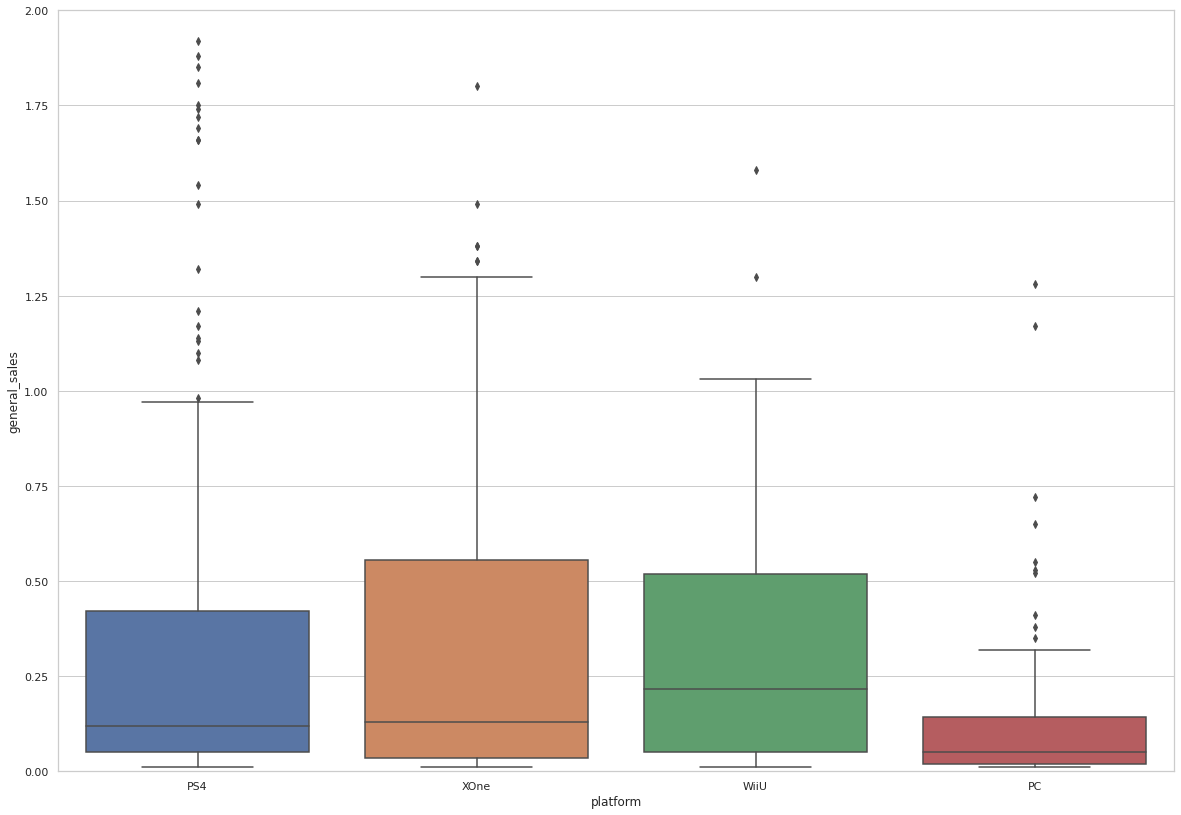

In [1379]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,14))
sns.boxplot(data=data, x='platform', y='general_sales')
plt.xlabel('platform', fontsize=12)
plt.ylabel('general_sales',fontsize=12)
plt.ylim(0, 2)

'WiiU' лидирует по медиане продаж. 

### Посмотрим, как влияют на продажи внутри одной популярной платформы оценки пользователей и критиков

In [1380]:
ps4 = data[data['platform'] == 'PS4']
ps4['general_sales'].corr(ps4['critic_score'])

0.3928485555130601

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='general_sales'>

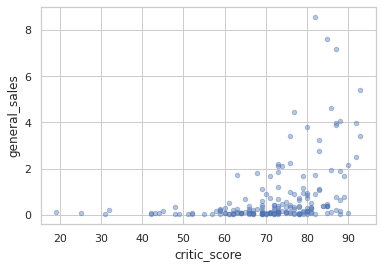

In [1381]:
ps4.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, alpha=0.4)

Влияние небольшое

Посмотрим как влияют оценки пользователей на продажи PS4

In [1382]:
ps4['general_sales'].corr(ps4['user_score'])


-0.05973845712638215

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='general_sales'>

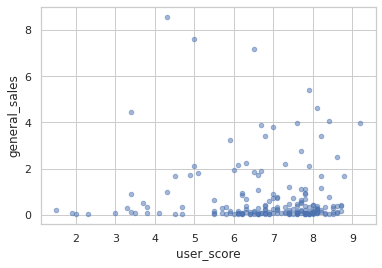

In [1383]:
ps4.plot(x='user_score', y='general_sales', kind='scatter', grid=True, alpha=0.5)

Влияния нет

Посмотрим как влияют оценки критиков на продажи PC

In [1384]:
pc = data[data['platform'] == 'PC']
pc['general_sales'].corr(pc['critic_score'])

0.3773317477241351

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='general_sales'>

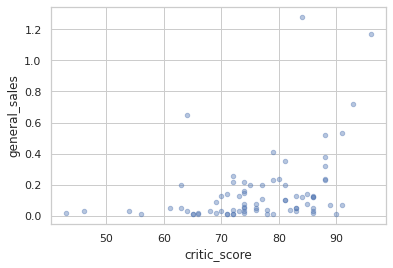

In [1385]:
pc.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, alpha=0.4)

Влияние небольшое

Посмотрим как влияют оценки пользователей на продажи PC

In [1386]:
pc['general_sales'].corr(pc['user_score'])

0.15038053045029076

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='general_sales'>

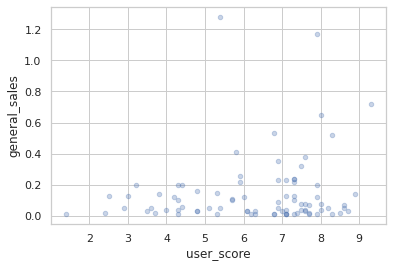

In [1387]:
pc.plot(x='user_score', y='general_sales', kind='scatter', grid=True, alpha=0.3)

Влияния нет

Посмотрим как влияют оценки критиков на продажи XOne

In [1388]:
xone = data[data['platform'] == 'XOne']
xone['general_sales'].corr(xone['critic_score'])

0.430888745821368

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='general_sales'>

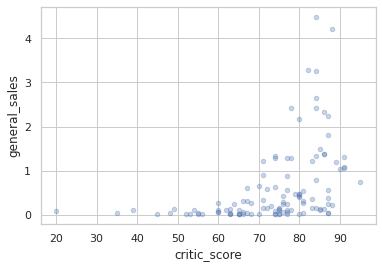

In [1389]:
xone.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, alpha=0.3)

Влияние снова небольшое

Посмотрим как влияют оценки пользователей на продажи XOne

In [1390]:
xone['general_sales'].corr(xone['user_score'])

-0.04146733387366271

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='general_sales'>

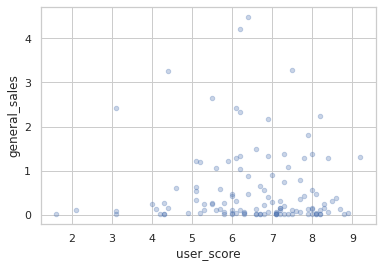

In [1391]:
xone.plot(x='user_score', y='general_sales', kind='scatter', grid=True, alpha=0.3)

Снова влияния нет

Посмотрим как влияют оценки критиков на продажи WiiU

In [1392]:
wiiu = data[data['platform'] == 'WiiU']
wiiu['general_sales'].corr(wiiu['critic_score'])

0.31704571176962204

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='general_sales'>

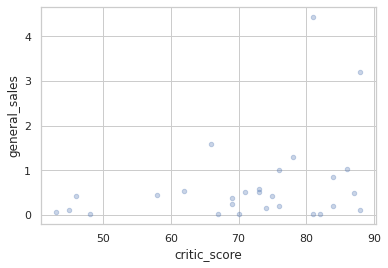

In [1393]:
wiiu.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, alpha=0.3)

Как и в предыдущих случаях влияние небольшое

Посмотрим как влияют оценки пользователей на продажи WiiU

In [1394]:
wiiu['general_sales'].corr(wiiu['user_score'])

0.36351857248094444

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='general_sales'>

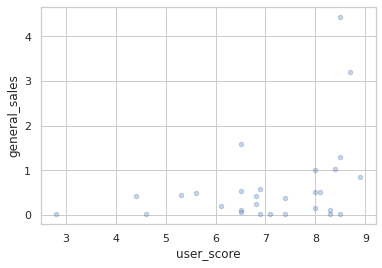

In [1395]:
wiiu.plot(x='user_score', y='general_sales', kind='scatter', grid=True, alpha=0.3)

А тут в отличие от предыдущих платформ, небольшое влияние есть

### Посмотрим на общее распределение игр по жанрам

Посмотрим, игр какого жанра больше всего

In [1396]:
data['genre'].value_counts()

Action          211
Shooter          73
Role-Playing     65
Sports           65
Adventure        41
Racing           38
Misc             34
Fighting         24
Simulation       23
Strategy         21
Platform         17
Puzzle            2
Name: genre, dtype: int64

Найдем жанр, приносящий высокий доход. Для этого возьмем медианные значения

In [1397]:
data.pivot_table(index='genre', values='general_sales', aggfunc = 'median').sort_values(by='general_sales', ascending=False)

,general_sales
genre,
Shooter,0.410
Role-Playing,0.200
Sports,0.170
Fighting,0.165
Platform,0.140
Simulation,0.100
Action,0.090
Strategy,0.080
Racing,0.065


**Вывод:**
- Количество выпускаемых игр растет с каждым годом
- Жизненный цикл одной платформы равен 10-11 годам
- На данный момент потенциально прибыльные платформы: PC, PS4, WiiU, XOne
- Оценки критиков имеют небольшое влияние на продажи
- Оценки пользователей не влияют на продажи. За исключением WiiU
- Больше всего игр выпускается в жанре Action
- Стабильно приносят самый высокий доход игры в жанре Shooter	

## Составим портрет пользователя каждого региона

### Посмотрим долю продаж по регионам

Северная Америка

In [1398]:
data.pivot_table(index='platform', values='na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False)

,na_sales
platform,
PS4,63.86
XOne,50.30
WiiU,8.86
PC,3.72


<AxesSubplot:ylabel='na_sales'>

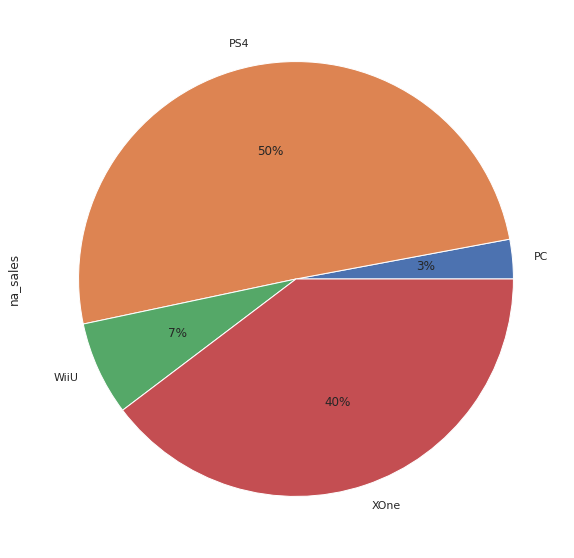

In [1399]:
data.pivot_table(index='platform', values='na_sales', aggfunc = 'sum').plot.pie(y='na_sales', autopct='%1.0f%%', legend=None, figsize=(10, 10))

Лидируют PS4 и XOne

Европа

In [1400]:
data.pivot_table(index='platform', values='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
WiiU,6.49


<AxesSubplot:ylabel='eu_sales'>

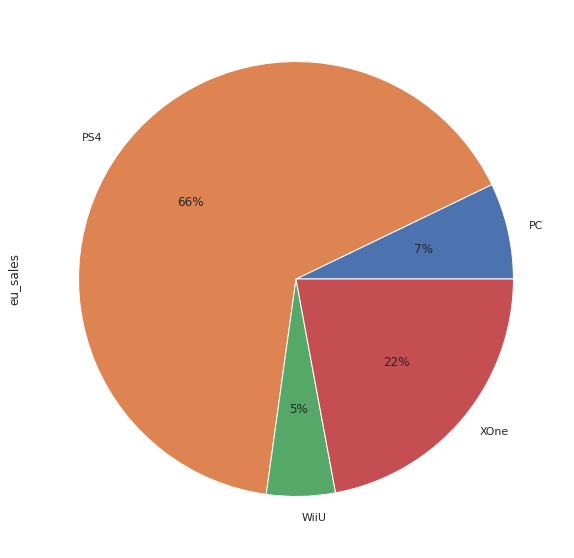

In [1401]:
data.pivot_table(index='platform', values='eu_sales', aggfunc = 'sum').plot.pie(y='eu_sales', autopct='%1.0f%%', legend=None, figsize=(10, 10))

Здесь лидеры PS4

Япония

In [1402]:
data.pivot_table(index='platform', values='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
PS4,12.05
WiiU,4.12
XOne,0.18
PC,0.00


<AxesSubplot:ylabel='jp_sales'>

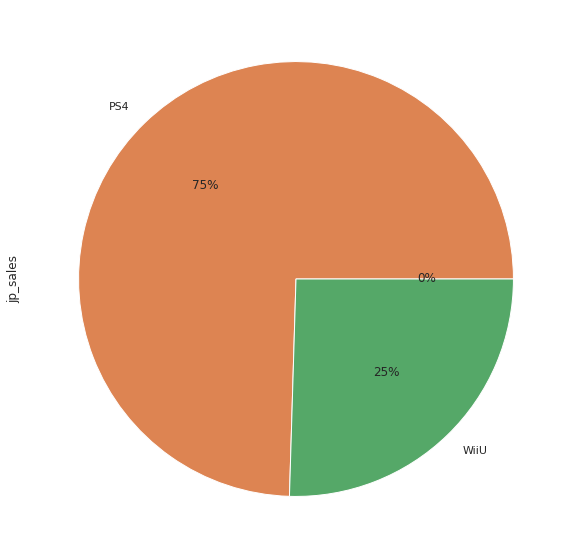

In [1403]:
data.pivot_table(index='platform', values='jp_sales', aggfunc = 'sum').head(3).plot.pie(y='jp_sales', autopct='%1.0f%%', legend=None, figsize=(10, 10))

Лидер PS4, а XOne и PC практически нет

Другие регионы

In [1404]:
data.pivot_table(index='platform', values='other_sales', aggfunc = 'sum').sort_values(by='other_sales', ascending=False)

,other_sales
platform,
PS4,28.70
XOne,7.71
WiiU,1.48
PC,0.95


<AxesSubplot:ylabel='other_sales'>

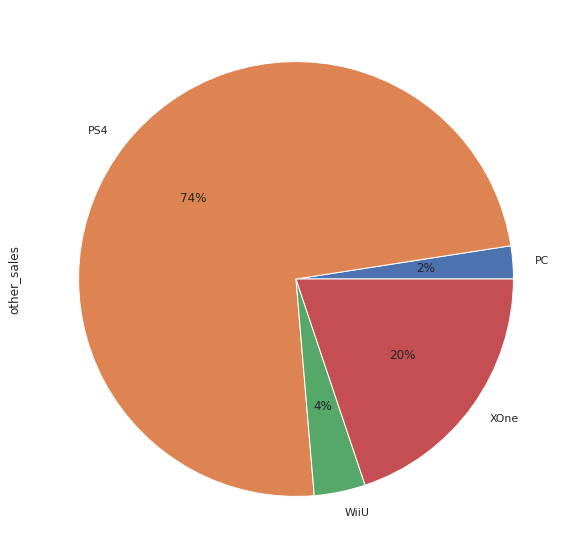

In [1405]:
data.pivot_table(index='platform', values='other_sales', aggfunc = 'sum').plot.pie(y='other_sales', autopct='%1.0f%%', legend=None, figsize=(10, 10))

Лидирует PS4

### Посмотрим популярность жанров по регионам

Северная Америка

In [1406]:
data.pivot_table(index='genre', values='na_sales', aggfunc = 'median').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Shooter,0.17
Platform,0.07
Fighting,0.06
Role-Playing,0.06
Sports,0.04


<AxesSubplot:xlabel='genre'>

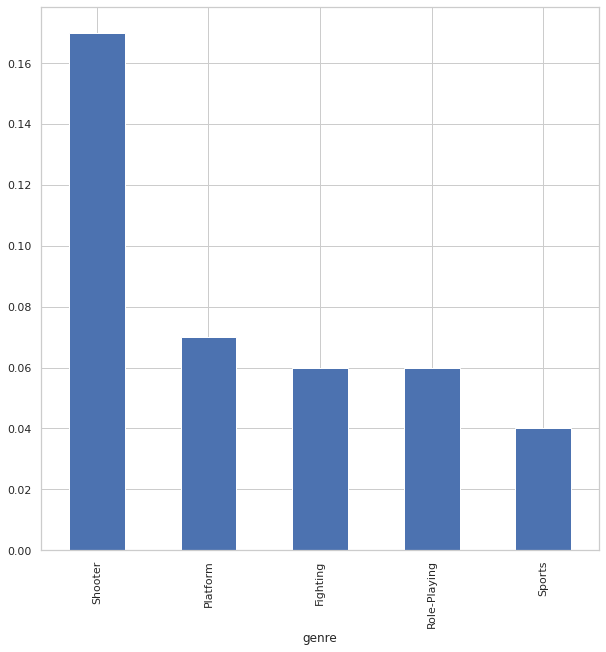

In [1407]:
data.pivot_table(index='genre', values='na_sales', aggfunc = 'median').sort_values(by='na_sales', ascending=False).head(5).plot.bar(y='na_sales',legend=None, figsize=(10, 10))

Лидирует Shooter

Европа

In [1408]:
data.pivot_table(index='genre', values='eu_sales', aggfunc = 'median').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Shooter,0.190
Fighting,0.075
Platform,0.060
Role-Playing,0.060
Sports,0.060


<AxesSubplot:xlabel='genre'>

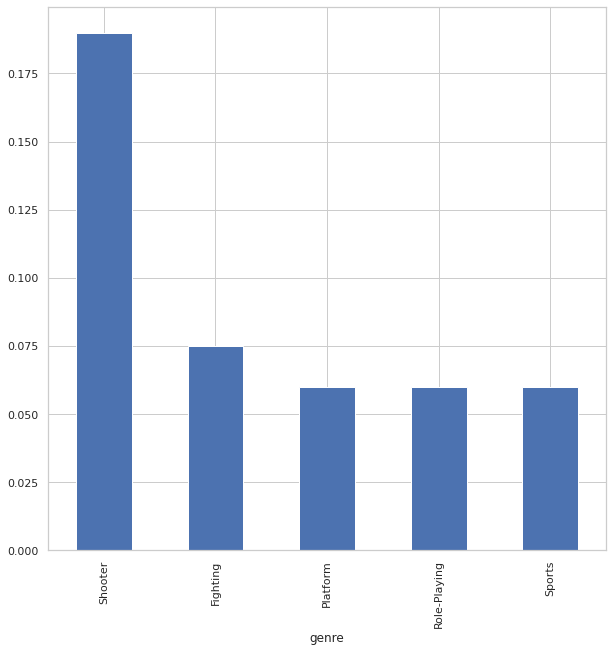

In [1409]:
data.pivot_table(index='genre', values='eu_sales', aggfunc = 'median').sort_values(by='eu_sales', ascending=False).head(5).plot.bar(y='eu_sales',legend=None, figsize=(10, 10))

Так же лидирует жанр Shooter

Япония

In [1410]:
data.pivot_table(index='genre', values='jp_sales', aggfunc = 'median').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Fighting,0.020
Role-Playing,0.020
Puzzle,0.005
Action,0.000
Adventure,0.000


<AxesSubplot:xlabel='genre'>

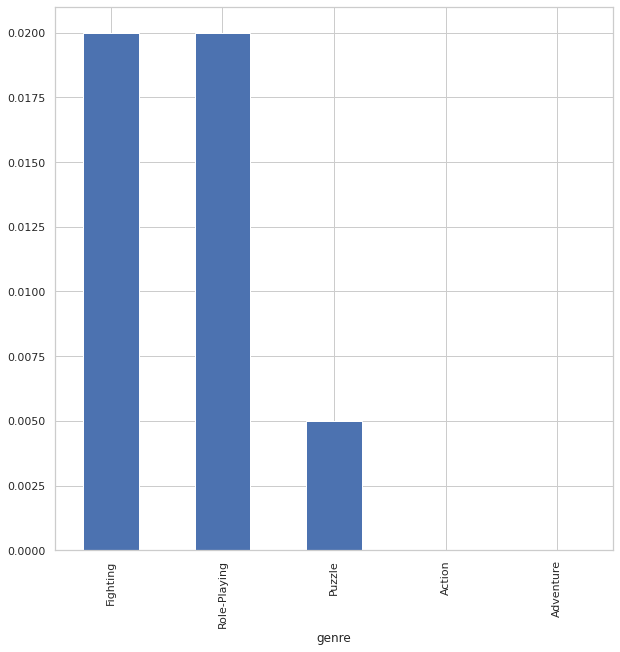

In [1411]:
data.pivot_table(index='genre', values='jp_sales', aggfunc = 'median').sort_values(by='jp_sales', ascending=False).head(5).plot.bar(y='jp_sales',legend=None, figsize=(10, 10))

Тут лидируют Action и Role Playing

Другие регионы

In [1412]:
data.pivot_table(index='genre', values='other_sales', aggfunc = 'median').sort_values(by='other_sales', ascending=False).head(5)

,other_sales
genre,
Shooter,0.04
Fighting,0.02
Platform,0.02
Role-Playing,0.02
Sports,0.02


<AxesSubplot:xlabel='genre'>

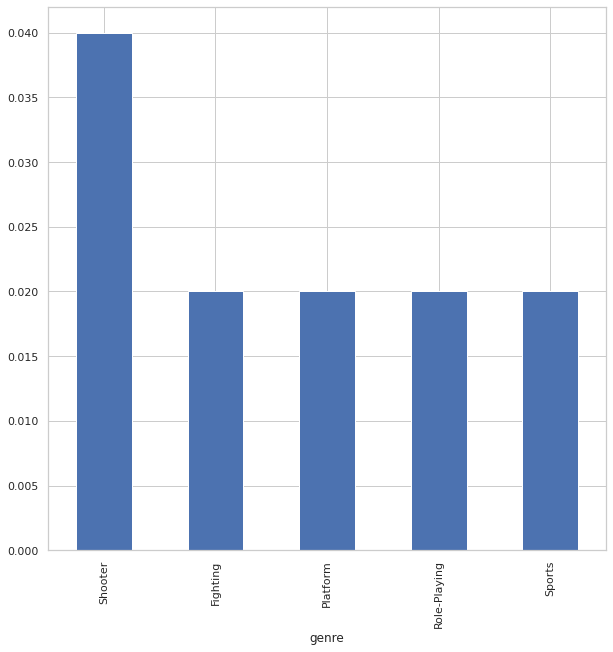

In [1413]:
data.pivot_table(index='genre', values='other_sales', aggfunc = 'median').sort_values(by='other_sales', ascending=False).head(5).plot.bar(y='other_sales',legend=None, figsize=(10, 10))

Лидирует Shooter

### Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе

In [1414]:
data['rating'].value_counts()

M       130
T       128
E       103
E10+     58
Name: rating, dtype: int64

Северная Америка

<AxesSubplot:xlabel='rating'>

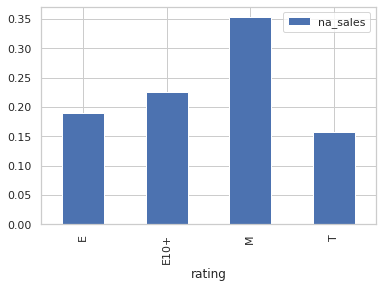

In [1415]:
data.pivot_table(index='rating',values='na_sales').plot(y='na_sales', kind='bar')

Европа

<AxesSubplot:xlabel='rating'>

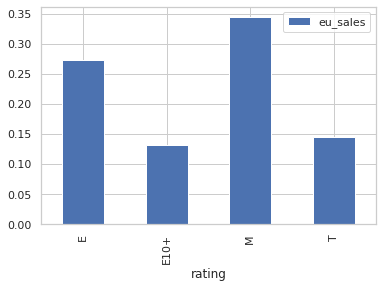

In [1416]:
data.pivot_table(index='rating',values='eu_sales').plot(y='eu_sales', kind='bar')

Япония

<AxesSubplot:xlabel='rating'>

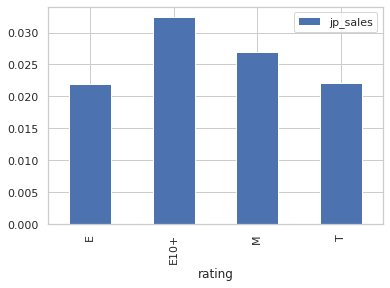

In [1417]:
data.pivot_table(index='rating',values='jp_sales').plot(y='jp_sales', kind='bar')

Другие регионы

<AxesSubplot:xlabel='rating'>

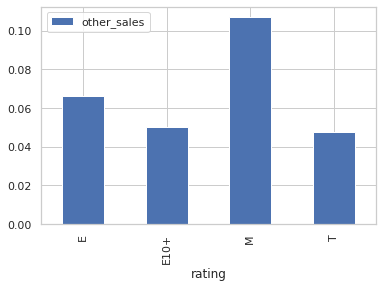

In [1418]:
data.pivot_table(index='rating',values='other_sales').plot(y='other_sales', kind='bar')

**Вывод:**
- Япония отличается от остальных регионов
- PS4 самая популярная платформа. В Северной Америке, так же популярен XOne
- Самые продаваемый жанр Shooter. В Японии Action и Role Playing
- Самые большие продажи у игр с рейтингом 'М'(для взрослых). В Японии - 'Е'(для всех)

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Удалим пропущенные значения в столбцe 'user_score'

In [1419]:
data = data.dropna(subset=['user_score'])

- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются
- alpha = 0.05

In [1420]:
print("Средний рейтинг Xbox One: ", data[data['platform'] == 'XOne']['user_score'].mean().round(1))
print("Средний рейтинг PC: ", data[data['platform'] == 'PC']['user_score'].mean().round(1))
results = st.ttest_ind(
    data[data['platform'] == 'XOne']['user_score'],
    data[data['platform'] == 'PC']['user_score'], equal_var=False)
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний рейтинг Xbox One:  6.5
Средний рейтинг PC:  6.3
p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Гипотеза подтвердилась, средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные
- alpha = 0.05

In [1421]:
print("Средний рейтинг Action: ", data[data['genre'] == 'Action']['user_score'].mean().round(1))
print("Средний рейтинг Sports: ", data[data['genre'] == 'Sports']['user_score'].mean().round(1))
results = st.ttest_ind(
    data[data['genre'] == 'Action']['user_score'],
    data[data['genre'] == 'Sports']['user_score'], equal_var=False)
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний рейтинг Action:  6.8
Средний рейтинг Sports:  5.5
p-значение: 3.9108708293980225e-06
Отвергаем нулевую гипотезу


Гипотеза не подтвердилась, средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

Если брать в общем по миру, то самой популярной, будет игра в жанре Shooter, на платформе PS4, с рейтингом 'M'.

### По регионам потенциально популярный продукт выглядит так:

**Северной Америки:**
- Платформа PS4 или XOne
- Жанр Shooter
- рейтинг ESRB - 'M'

**Европа:**
- Платформа PS4
- Жанр Shooter
- рейтинг ESRB - 'M'

**Япония:**
- Платформа PS4
- Жанры Action или Role Playing
- рейтинг ESRB - 'E'

**Другие регионы:**
- Платформа PS4
- Жанр Shooter
- рейтинг ESRB - 'M'

Не стоит опираться на оценки критиков либо пользователей, они особо не влияют на продажи.